2일차 학습! 
# 판다스 치트시트를 활용한 기초 익히기 

- 학습목표 : 판다스 치트시트를 활용하여 기초를 학습한다. 
- 핵심 키워드:  
    *pandas
    *DataFrame
    *series 
    *sort
    *drop
    *groupby
    *pivot table 
    *plot
    

* 학습내용 

pandas (pannel data system) :  수식으로 계산도 할 수 있고 시각화도 할 수 있는 데이터 분석도구입니다. 
엑셀로도 데이터를 분석할 수 있는데 왜 '판다스'를 사용하는 것일까요?
엑셀로는 힘든 대용량의 데이터를 판다스는 분석할 수 있기 때문입니다. 

아래에 첨부되어 있는 10 minutes to pandas를 한번씩 실행해보시면 판다스의 전반적인 것을 익힐 수 있습니다. 
(다만, 10분은 문서를 스크롤 하는데 걸리는 시간입니다...실제로는 더 오래 걸립니다.) 

추가로 같이 첨부된 pandas Cheat Sheet도 추천드립니다. 

우선 판다스를 함께 호출해볼게요! 
판다야!! 

10 minutes to pandas
https://pandas.pydata.org/pandas-docs/version/1.0.0/getting_started/10min.html
pandas Cheat Sheet
http://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

* pandas사용시 유리한점: 
    1. 엑셀을 사용했을때에 비해 대용량 데이터를 빠르게 처리할 수 있게된다. 
    2. 주피터 노트북에 소스코드를 작성해놓게 되면, 파일만(데이터 프레임 만) 새로 로드를 해오게 된다면 기존의 소스코드 들을 재사용하기에 원활하다. 따라서 주기적으로(월, 주별) 반복되는 작업이 있다면 이를 활용하는것이 효율적이다.
    

In [2]:
import pandas as pd 

## 판다스의 기본 자료구조 
### DataFrame

In [3]:
# 공식문서(도움말) 활용하기 
# pd.DataFrame?
# pd.DataFrame(Shift + tab + tab)

pd.DataFrame?

In [5]:
# 데이터 프레임 생성하기 
df = pd.DataFrame(
{"a" : [4 ,5, 6],
"b" : [7, 8, 9],
"c" : [10, 11, 12]},
index = [1, 2, 3])
df 

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


### series 

In [7]:
# series: 
# 데이터 프레임의 특정열을 호출하면, 시리즈 형태로 리턴된다. 

df["a"]

1    4
2    5
3    6
Name: a, dtype: int64

In [11]:
# 시리즈의 데이터프레임 화 
## 괄호를 두번 붙여주면 데이터프레임 형식으로 출력된다. 
df[["a"]]

# 데이터프레임은 2차원의 자료 구조를 가지며, 시리즈는 1차원의 자료구조를 갖는다. 
# 수학적으로 시리즈는 벡터, 데이터프레임은 행렬의 구조를 갖는다. 

,a
1,4
2,5
3,6


### subset

In [12]:
# 부분집합! 
df["a"] > 4
# 불리언 형태의 리턴값! 

1    False
2     True
3     True
Name: a, dtype: bool

In [13]:
# 조건을 만족하는 요소만 따로 담는 배열지정 
df[df["a"]>4] 

,a,b,c
2,5,8,11
3,6,9,12


In [14]:
# 한개의 컬럼만 가져오기 
df["a"]

1    4
2    5
3    6
Name: a, dtype: int64

In [16]:
# 두개 이상의 컬럼을 가져올 때 
df["a","b"]
## 키 에러발생 

KeyError: ('a', 'b')

In [17]:
# 두개 이상의 컬럼을 가져올때는 항상 데이터 프레임 형태로 가져 와야함! 
# 다시 말해, 대괄호 두개로 감싸야 한다. 
df[["a","b"]]

,a,b
1,4,7
2,5,8
3,6,9


In [19]:
# 데이터 프레임 미리보기 
df.head() #디폴트 6줄. 보고자 하는 행의 갯수 괄호안에 입력! 

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [21]:
df.tail() # 마찬가지로 원하는 열의 갯수는 괄호에 입력 . 
          # 출력 형태는 데이터프레임 

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [22]:
# 그 외의 기타 명령어 
# df.iloc[10:20]
# df.nlargest(n, 'value')
# df.nsmallest(n, 'value')
#  ... 판다스 치트 시트 확인 후 적용해볼것! 


### Summerize Data 

In [23]:
df["a"].value_counts()
# 반복되는 숫자의 빈도수를 측정 

6    1
5    1
4    1
Name: a, dtype: int64

In [32]:
# 다시, 다른경우에서 value_counts()를 실행해보자. 

df = pd.DataFrame({"a" : [4,5,6,4],
                    "b" : [7,8,9,9],
                    "c" : [10,11,12,11]},
                    index = [1,2,3,4])
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12
4,4,9,11


In [33]:
df["a"].value_counts()

4    2
6    1
5    1
Name: a, dtype: int64

In [31]:
# df의 길이를 측정 (몇 개의 행을 가지고 있는가?)
len(test)

4

### Reshaping

#### sort_value, drop 

In [34]:
df["a"].sort_values()
# "a" 열을 값을 기준으로 정렬 

1    4
4    4
2    5
3    6
Name: a, dtype: int64

In [35]:
# 데이터 프레임 전체에를 정렬 ( "a"열의 값을 기준으로...)
df.sort_values("a")

,a,b,c
1,4,7,10
4,4,9,11
2,5,8,11
3,6,9,12


In [38]:
# 내림차순으로 정렬 
# 옵션 : ascending = False 
df.sort_values("a",ascending = False)

,a,b,c
3,6,9,12
2,5,8,11
1,4,7,10
4,4,9,11


In [41]:
# 데이터 프레임의 특정 칼럼값을 드랍하고 싶을때 
# 디폴트 값은 행을기준으로 한다 
#  default => axis = 0 
df.drop(["c"], axis =1) # 우리는 열을 기준으로 드랍하고 싶기 때문에 axis = 1 옵션 추가 ! 

df = df.drop(["c"], axis=1)
df

,a,b
1,4,7
2,5,8
3,6,9
4,4,9


### Group Data 

#### Groupby and pivot_table

In [44]:
df.groupby(["a"])["b"].mean()
# a 값을 기준으로 B의 평균값을 구해준다. 
# 즉, a 가 4일때 --> b는 7과 9 --> 이것의 평균 8 

a
4    8
5    8
6    9
Name: b, dtype: int64

In [46]:
# 즉, 어떤 값을 기준으로 다양한 연산이 가능하다. 
# 밑의 코드는 이들을 한번에 계산하여 하나의 형태로 보여주기 위한 예제코드이다. 
df.groupby(["a"])["b"].agg(["mean","sum","count"])
# agg 는 aggregation의 준말 

,mean,sum,count
a,,,
4,8,16,2
5,8,8,1
6,9,9,1


In [47]:
# 한번에 기초적인 연산값들을 반환 
df.groupby(["a"])["b"].describe()

# .describe() 메소드는 기초적인 데이터 요약을 제공한다.  

,count,mean,std,min,25%,50%,75%,max
a,,,,,,,,
4,2.0,8.0,1.414214,7.0,7.5,8.0,8.5,9.0
5,1.0,8.0,NaN,8.0,8.0,8.0,8.0,8.0
6,1.0,9.0,NaN,9.0,9.0,9.0,9.0,9.0


In [48]:
# shift tab tab 으로 기본옵션 확인하기! 
pd.pivot_table(df, index = "a")
# 많은 옵션 중, aggregation 옵션은 기본적으로 mean값을 출력하도록 설정되어 있다. 



,b
a,
4,8
5,8
6,9


In [49]:
pd.pivot_table(df, index = "a", values ="b", aggfunc = "sum")

,b
a,
4,16
5,8
6,9


### Plotting 

<AxesSubplot:>

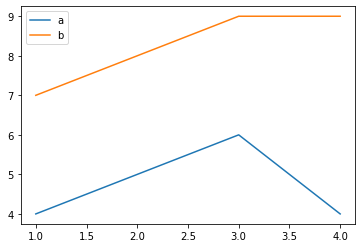

In [50]:
# 그래프 그리기 
df.plot()

<AxesSubplot:xlabel='a'>

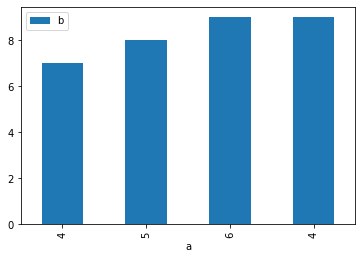

In [56]:
df.plot.bar(x = "a")